In [1]:
print("Hello India")

Hello India


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Output dataframes instead of arrays

set_config(transform_output="pandas")

In [4]:
# load our dataset

sacramento = pd.read_csv("dataset/sacramento.csv")

In [5]:
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


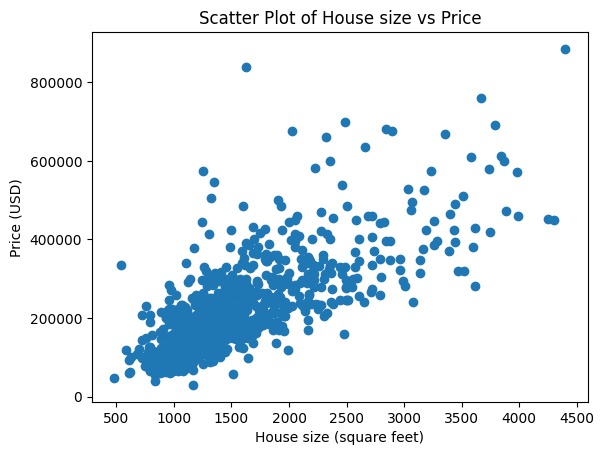

In [6]:
# Visualize

# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [7]:
np.random.seed(10)
small_sacramento = sacramento.sample(n=30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


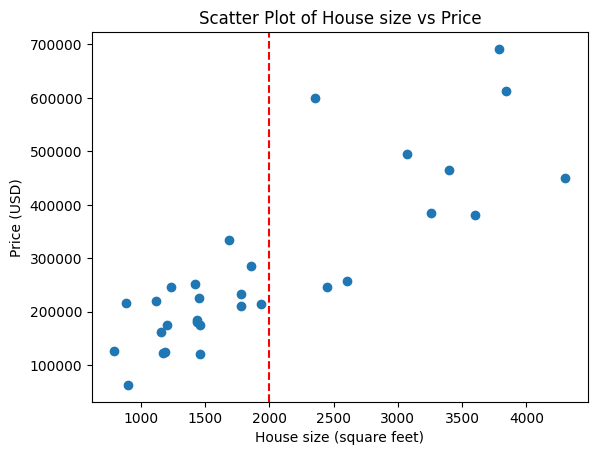

In [8]:
# Visualize

plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [9]:
# Calculate the absolute difference between 2000 and the square footage of each house
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

# Find the 5 rows with the smallest distances (closest to 2000 square feet)
nearest_neighbors = small_sacramento.nsmallest(5, "dist")

# Display the 5 nearest neighbors
nearest_neighbors


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


In [10]:
prediction = nearest_neighbors["price"].mean()
prediction

np.float64(255630.0)

In [ ]:
# Splitting the data into training and test data

sacramento_train, sacramento_test = train_test_split(sacramento, train_size=0.75, random_state=42)

In [12]:
# Step 1. Define our X and y

X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [ ]:
# Step 2: Initialize our KNN regressor
knn_regressor = KNeighborsRegressor()

In [14]:
# step 3. define our parameter grid

param_grid = {
    "n_neighbors" : range(1, 201, 3)
}

In [16]:
# step 4. Initialize our grid search

sacramento_gridsearch = GridSearchCV(
    estimator = knn_regressor,
    param_grid = param_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error" # r2 - can evaluate 
)

In [17]:
# Step 5. fir our grid search to the training data

sacramento_gridsearch.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(1, 201, 3)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,19


In [31]:
#pd.set_option('display.max_rows', None)
results = pd.DataFrame(sacramento_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006370,0.003333,0.006558,0.002281,1,{'n_neighbors': 1},-109655.806526,-120595.130103,-112297.705616,-120818.303875,-112115.342058,-115096.457636,4675.375295,67
1,0.016073,0.004479,0.042569,0.054840,4,{'n_neighbors': 4},-84174.862641,-96956.242253,-99795.018109,-90744.186040,-96708.754264,-93675.812662,5590.476086,49
2,0.010592,0.002758,0.017357,0.005628,7,{'n_neighbors': 7},-82345.022650,-94442.362234,-97121.482754,-87597.243261,-90165.220710,-90334.266322,5182.482900,31
3,0.013138,0.003816,0.013549,0.006500,10,{'n_neighbors': 10},-79985.458885,-94722.834905,-95690.903059,-84342.146484,-88185.414673,-88585.351601,6004.672460,20
4,0.006921,0.002439,0.006430,0.000651,13,{'n_neighbors': 13},-77430.800364,-92812.039395,-96240.816885,-84657.354893,-85242.671132,-87276.736534,6617.179998,6
5,0.004525,0.000452,0.005625,0.001232,16,{'n_neighbors': 16},-76694.888762,-93161.417884,-97831.534297,-84036.827132,-83282.882249,-87001.510065,7537.610624,4
6,0.004839,0.000382,0.005545,0.000650,19,{'n_neighbors': 19},-76433.653070,-92712.500840,-97385.573363,-82625.375952,-83950.474751,-86621.515595,7481.459416,1
7,0.005547,0.000835,0.007200,0.001481,22,{'n_neighbors': 22},-76193.344530,-92163.118393,-98571.117671,-83391.706835,-82901.393279,-86644.136142,7829.655412,2
8,0.005345,0.001062,0.006851,0.001015,25,{'n_neighbors': 25},-76418.878174,-93399.616892,-98536.929259,-83448.028427,-81730.096687,-86706.709888,8074.332910,3
9,0.005363,0.000663,0.007200,0.001047,28,{'n_neighbors': 28},-75907.224288,-93551.873437,-99640.124290,-84043.091505,-82046.129273,-87037.688559,8473.800818,5


In [32]:
results["mean_test_score"] = results["mean_test_score"].abs()

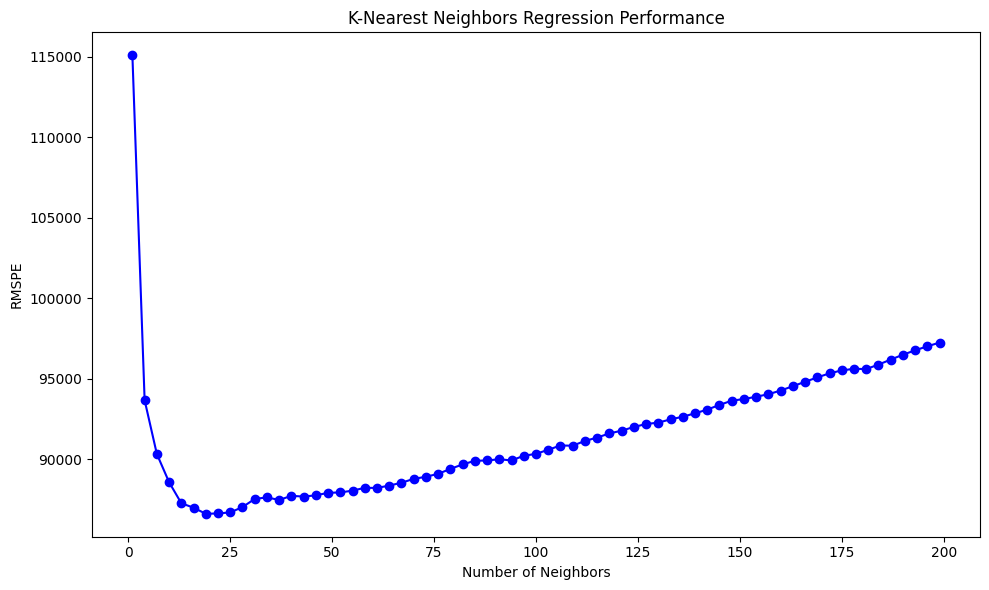

In [33]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [34]:
sacramento_gridsearch.best_params_

{'n_neighbors': 19}

In [38]:
# make prediction on the test set

sacramento_test["predicted"] = sacramento_gridsearch.predict(sacramento_test[["sq__ft"]])

In [39]:
sacramento_test

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,predicted
247,2103 BURBERRY WAY,SACRAMENTO,95835,CA,3,2,1800,Residential,Mon May 19 00:00:00 EDT 2008,362305,38.673420,-121.508542,263188.894737
589,483 ARCADE BLVD,SACRAMENTO,95815,CA,4,2,1316,Residential,Tue May 20 00:00:00 EDT 2008,89000,38.623571,-121.454884,214900.000000
227,117 EVCAR WAY,RIO LINDA,95673,CA,3,2,1182,Residential,Mon May 19 00:00:00 EDT 2008,164000,38.687659,-121.463300,187366.894737
291,3624 20TH AVE,SACRAMENTO,95820,CA,5,2,1516,Residential,Mon May 19 00:00:00 EDT 2008,150000,38.534508,-121.467907,235495.578947
539,2109 HAMLET PL,CARMICHAEL,95608,CA,2,2,1598,Residential,Tue May 20 00:00:00 EDT 2008,484000,38.602754,-121.329326,205203.578947
799,8929 SUTTERS GOLD DR,SACRAMENTO,95826,CA,4,3,1914,Residential,Wed May 21 00:00:00 EDT 2008,328360,38.550848,-121.370224,274885.421053
198,9048 PINTO CANYON WAY,ROSEVILLE,95747,CA,4,3,2577,Residential,Fri May 16 00:00:00 EDT 2008,367463,38.792493,-121.331899,335447.052632
294,3715 TALLYHO DR Unit 78HIGH,SACRAMENTO,95826,CA,1,1,625,Condo,Mon May 19 00:00:00 EDT 2008,100000,38.544627,-121.357960,126830.684211
445,4900 ELUDE CT,SACRAMENTO,95842,CA,4,2,1627,Residential,Thu May 15 00:00:00 EDT 2008,223000,38.696740,-121.350519,265818.894737
423,2149 COTTAGE WAY,SACRAMENTO,95825,CA,3,1,1285,Residential,Thu May 15 00:00:00 EDT 2008,143012,38.603593,-121.417011,189302.894737


In [41]:
# calculate RMSPE
mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**(1/2)

74240.70943389146

In [42]:
# calculate r2
r2_score(
  y_true = sacramento_test["price"],
  y_pred = sacramento_test["predicted"]  
)

0.49526130381694955

/Users/purushottamkumar/Documents/DSI/LCR/LCR/lcr-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


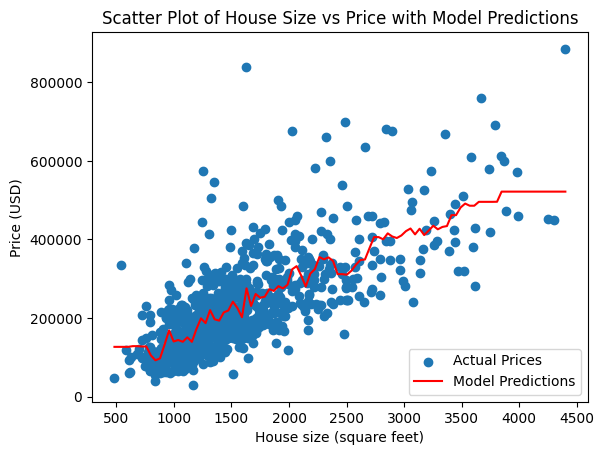

In [44]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacramento_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show()